In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
#gen data

numObjects = 6
numTimesteps = 27
times = np.arange(numTimesteps)
objPosArr = np.empty([numObjects,2,numTimesteps])

for i in range(numObjects):
    x = np.linspace(np.random.random()+np.random.randint(0,10), 10*np.random.random()-np.random.randint(2,5), numTimesteps)
    y = np.linspace(np.random.random()+np.random.randint(0,4), 12*np.random.random(), numTimesteps)
    objPosArr[i,0] = x
    objPosArr[i,1] = y


limits = [0,np.max(objPosArr)+1,0, np.max(objPosArr)+1]

In [3]:
def plotExpectedPos(posArr, times, lims):
    fig, ax = plt.subplots(1,figsize =(12,12))

    
    ax.set_xlim([lims[0],lims[1]])
    ax.set_ylim([lims[2],lims[3]])

    markers = itertools.cycle((".","x","^","*","+","v","o", "<", ">"))
    for i in range(posArr.shape[0]):
        ax.scatter(posArr[i,0],posArr[i,1], marker=next(markers), c=times, cmap="plasma")

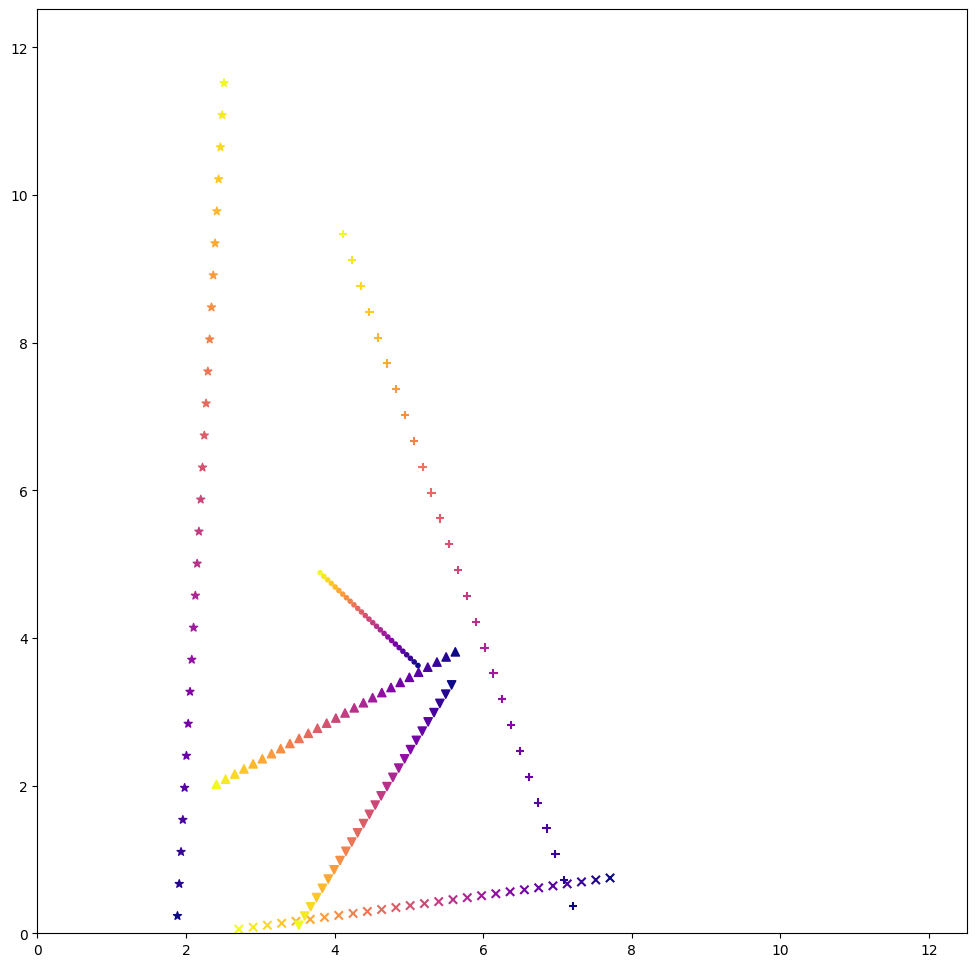

In [4]:
plotExpectedPos(objPosArr, times, limits)

TESS 27	07/04/20-07/30/20	326.85, -72.43, 214.51	301.60, -38.68, 282.66	312.45, -61.74, 291.17	8.60, -79.81, 165.21	90.01, -66.56, 244.53	

In [5]:
from find_asteroid import Skybotquery
from find_asteroid import MPCquery
import pandas as pd
ra, dec = 301.60, -38.68

#dates to JD?

date = 2458957.0 #17/04/20

# resultSB = Skybotquery(ra, dec, date, location="tess")

resultMP = MPCquery(ra,dec,date, 300, limit="20.0",obscode="C57")
resultMP.drop(resultMP.tail(1).index, inplace=True)

array([58956., 58961., 58966., 58971., 58976.])

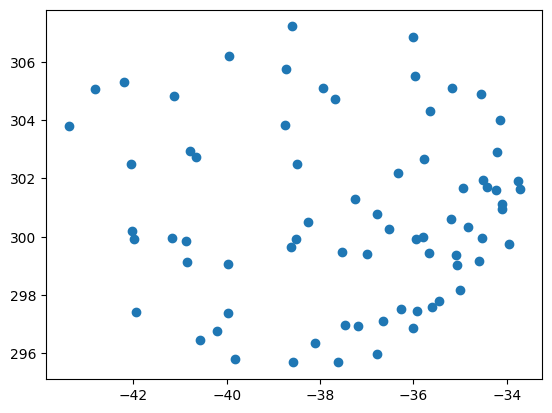

In [63]:
from astropy.coordinates import SkyCoord
import astropy.units as u
# import astropy.wcs as wcs
# from astropy.wcs import WCS
from astropy.time import Time

coords = SkyCoord(resultMP["RA"], resultMP["Dec"], unit=(u.hourangle,u.deg))

tabCor = coords.to_table()

plt.scatter(coords.dec, coords.ra)


t_i=Time("2020-04-17T00:00:00.000", format='isot', scale='utc')

t_i.mjd

dt = 5*u.day

timeList = t_i + dt*np.arange(0,5)
timeList.mjd

In [148]:
ra, dec = 301.60, -38.68

t_i=Time("2020-04-17T00:00:00.000", format='isot', scale='utc')

t_i.mjd

dt = 1*u.day

timeList = t_i + dt*np.arange(0,27)


resList = []
for i in timeList.jd:  
    queryRes = MPCquery(ra,dec,i, 300, limit="18.0",obscode="C57")
    resList.append(queryRes)



In [6]:
namesList = []

for i in range(len(resList)):
    namesList.append(resList[i]["name"])

namesList = [resList[i]["name"] for i in range(len(resList))]

names = pd.concat(namesList)

unqNames = pd.unique(names)

unqNames = np.delete(unqNames, np.where(unqNames==""))

In [150]:
valList = []
for j, name in enumerate(unqNames):    
    if name == "":
        continue
    raList = []
    decList = []
    for i in range(len(resList)):
        df = resList[i]
        index= df.index[df["name"]==name]
        try:
            raList.append(df.iloc[index[0]]["RA"])
            decList.append(df.iloc[index[0]]["Dec"])
        except:
            raList.append(np.nan)
            decList.append(np.nan)
        

    valList.append([name, raList, decList])



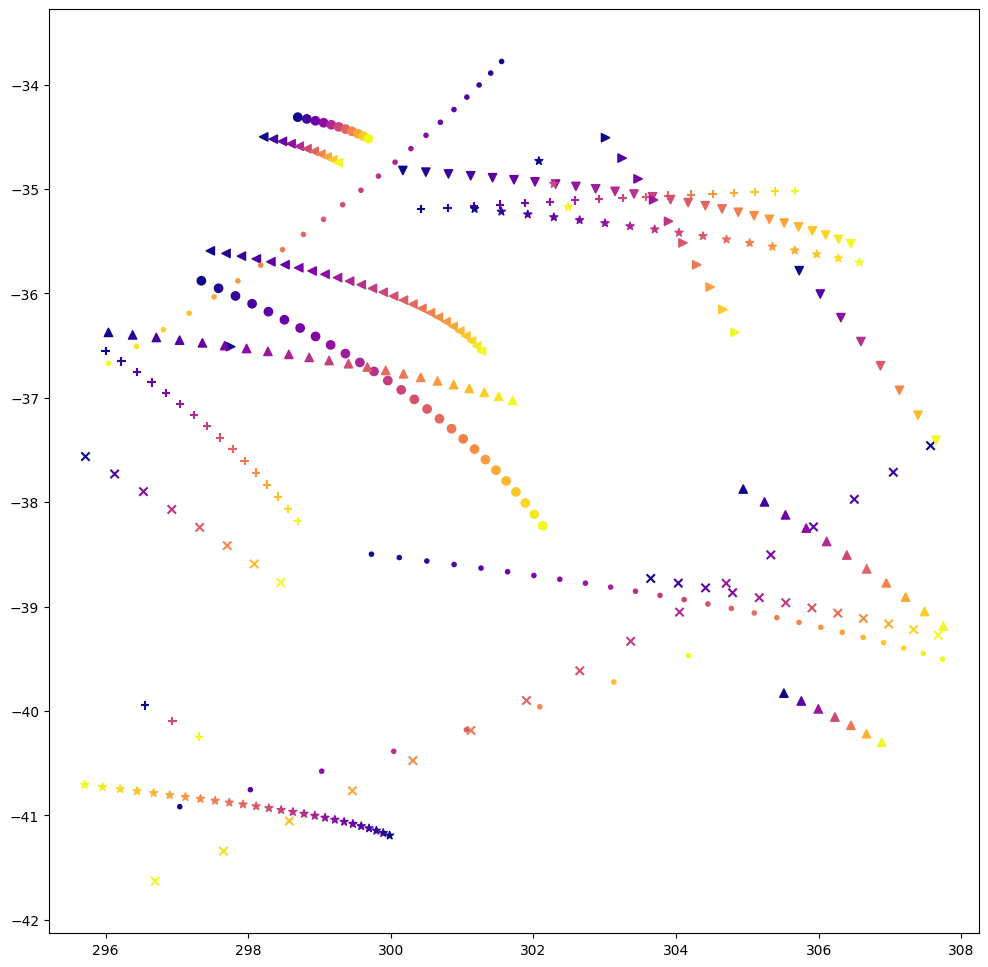

In [152]:
numObjects = unqNames.shape[0]-1
numTimesteps = 27
objPosArr = np.empty([numObjects,2,numTimesteps])


for i in range(numObjects):
    ra = valList[i][1]
    dec = valList[i][2]

    coords = SkyCoord(ra, dec, unit=(u.hourangle,u.deg))
    objPosArr[i,0] = coords.ra
    objPosArr[i,1] = coords.dec


limits = [np.nanmin(objPosArr[:,0,:])-0.5,np.nanmax(objPosArr[:,0,:])+0.5,np.nanmin(objPosArr[:,1,:])-0.5,np.nanmax(objPosArr[:,1,:])+0.5]



plotExpectedPos(objPosArr, timeList.jd, limits)



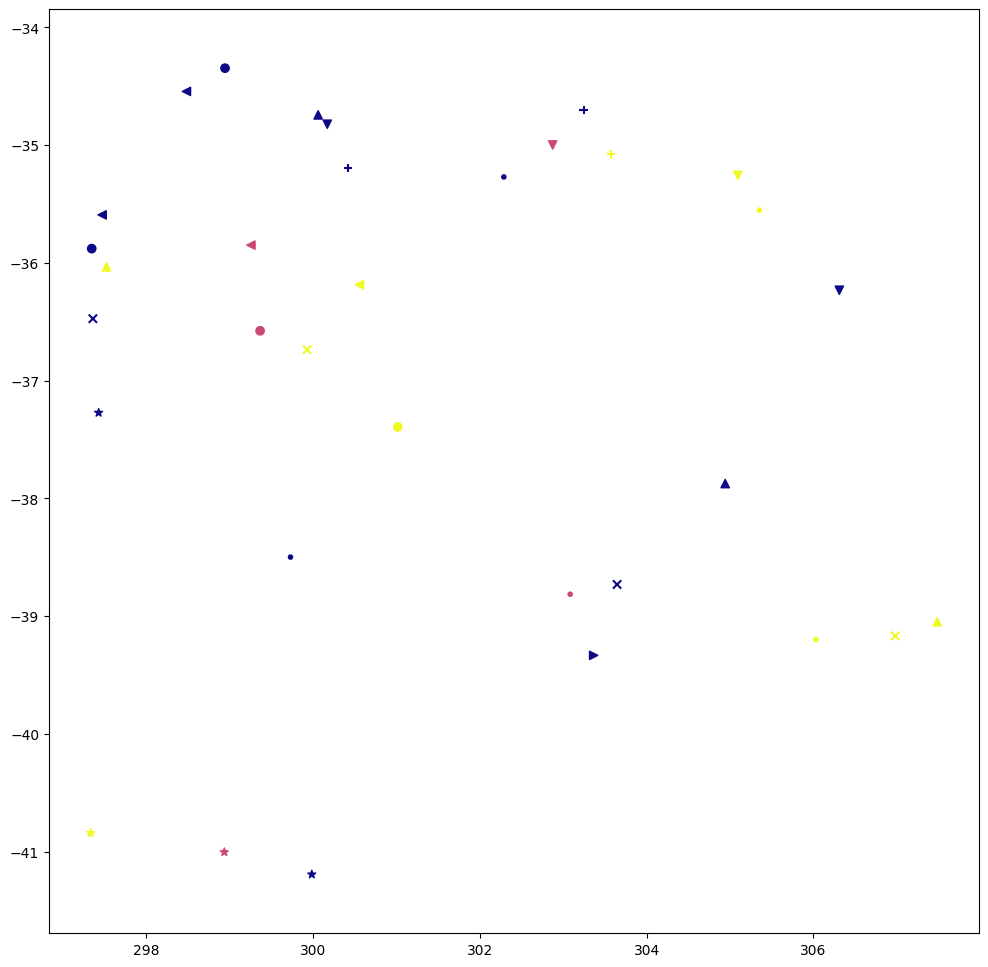

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.time import Time
from find_asteroid import MPCquery
import pandas as pd


def plotExpectedPos(posArr, times, lims):
    fig, ax = plt.subplots(1,figsize =(12,12))

    
    ax.set_xlim([lims[0],lims[1]])
    ax.set_ylim([lims[2],lims[3]])

    markers = itertools.cycle((".","x","^","*","+","v","o", "<", ">"))
    for i in range(posArr.shape[0]):
        ax.scatter(posArr[i,0],posArr[i,1], marker=next(markers), c=times, cmap="plasma")

ra, dec = 301.60, -38.68
numTimesteps = 3
t_i=Time("2020-04-17T00:00:00.000", format='isot', scale='utc')

t_i.mjd

dt = (27/numTimesteps)*u.day

timeList = t_i + dt*np.arange(0,numTimesteps)

resList = []
for i in timeList.jd:  
    queryRes = MPCquery(ra,dec,i, 300, limit="18.0",obscode="C57")
    resList.append(queryRes)

namesList = []
for i in range(len(resList)):
    namesList.append(resList[i]["name"])
namesList = [resList[i]["name"] for i in range(len(resList))]
names = pd.concat(namesList)
unqNames = pd.unique(names)


valList = []
for j, name in enumerate(unqNames):    
    if name == "":
        continue
    raList = []
    decList = []
    for i in range(len(resList)):
        df = resList[i]
        index= df.index[df["name"]==name]
        try:
            raList.append(df.iloc[index[0]]["RA"])
            decList.append(df.iloc[index[0]]["Dec"])
        except:
            raList.append(np.nan)
            decList.append(np.nan)
    valList.append([name, raList, decList])

numObjects = unqNames.shape[0]-1
objPosArr = np.empty([numObjects,2,numTimesteps])

for i in range(numObjects):
    ra = valList[i][1]
    dec = valList[i][2]

    coords = SkyCoord(ra, dec, unit=(u.hourangle,u.deg))
    objPosArr[i,0] = coords.ra
    objPosArr[i,1] = coords.dec


limits = [np.nanmin(objPosArr[:,0,:])-0.5,np.nanmax(objPosArr[:,0,:])+0.5,np.nanmin(objPosArr[:,1,:])-0.5,np.nanmax(objPosArr[:,1,:])+0.5]



plotExpectedPos(objPosArr, timeList.jd, limits)
